In [139]:
import numpy as np
import pandas as pd
from config_ihdp import args

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

from sklearn.linear_model import LogisticRegression

# from miwae import miwae
# from metrics import tau_dr, tau_ols, tau_ols_ps
# from generate_data import gen_lrmf, ampute, gen_dlvm
l_tau = ['tau_dr', 'tau_ols', 'tau_ols_ps', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
from baseline import *

## Choose metric

In [142]:
loss = '|tau-tau_ols|'

save_plots = False

set_id_range = list(range(1,19))

## Compute true ATE

In [144]:
tau = []
for set_id in set_id_range:
    X = pd.read_csv('./data/IHDP/csv/R_ihdp_npci_' + str(set_id) + '.csv')
    #print('y1-y0:', np.mean((X.iloc[:,0]==1)*(X.iloc[:,1]  - X.iloc[:,2]) +(X.iloc[:,0]==0)*(X.iloc[:,2]  - X.iloc[:,1])))
    tau.append(np.mean(X.iloc[:,4]  - X.iloc[:,3]))
    
gt = pd.DataFrame({'tau': tau, 'set_id': set_id_range})

gt.head()

,tau,set_id
0,4.016643,1
1,4.050275,2
2,4.098113,3
3,4.273514,4
4,4.161304,5


## Load data

In [145]:
df_mice = load_results('2019-11-04_ihdp_mi.csv_temp')
df_mice['algo'] = 'mice'
df_mice = df_mice[['set_id','prop_miss','method','tau_dr', 'tau_ols', 'tau_ols_ps',
                       '|1-tau_dr|', '|1-tau_ols|','|1-tau_ols_ps|', 'algo']]

# df_mice = load_results('2019-10-25_ihdp_mi.csv')
# df_mice['algo'] = 'mice'
# df_mice = df_mice[['set_id','prop_miss','method','tau_dr', 'tau_ols', 'tau_ols_ps',
#                        '|1-tau_dr|', '|1-tau_ols|','|1-tau_ols_ps|', 'algo']]

# df_mice_50 = load_results('2019-10-29_ihdp_mi.csv_temp')
# df_mice_50['algo'] = 'mice'
# df_mice_50 = df_mice_50[['set_id','prop_miss','method','tau_dr', 'tau_ols', 'tau_ols_ps',
#                        '|1-tau_dr|', '|1-tau_ols|','|1-tau_ols_ps|', 'algo']]

# df_mice = pd.concat((df_mice, df_mice_50))

df_mice = df_mice.loc[df_mice['set_id']<=np.max(list(set_id_range)),]

df_mice['tau'] = np.nan
for set_id in set_id_range:
    df_mice.loc[df_mice['set_id']== set_id, 'tau'] = float(gt.loc[gt['set_id']==set_id, 'tau'])

df_mice['|tau-tau_dr|'] = abs(df_mice['tau_dr'] - df_mice['tau'])
df_mice['|tau-tau_ols|'] = abs(df_mice['tau_ols'] - df_mice['tau'])
df_mice['|tau-tau_ols_ps|'] = abs(df_mice['tau_ols_ps'] - df_mice['tau'])
    
df_mice_all = df_mice.copy()
df_mice.head()

print('\n0% NA, ols: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0,'|tau-tau_ols|'])))
print('0% NA, dr: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0,'|tau-tau_dr|'])))
print(standard_error(df_mice.loc[df_mice['prop_miss']==0,'|tau-tau_dr|']))
print('0% NA, ols+ps: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0,'|tau-tau_ols_ps|'])))

print('\n10% NA, ols: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.1,'|tau-tau_ols|'])))
print('10% NA, dr: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.1,'|tau-tau_dr|'])))
print(standard_error(df_mice.loc[df_mice['prop_miss']==0.1,'|tau-tau_dr|']))

print('10% NA, ols+ps: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.1,'|tau-tau_ols_ps|'])))

print('\n30% NA, ols: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.3,'|tau-tau_ols|'])))
print('30% NA, dr: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.3,'|tau-tau_dr|'])))
print(standard_error(df_mice.loc[df_mice['prop_miss']==0.3,'|tau-tau_dr|']))
print('30% NA, ols+ps: '+ str(np.mean(df_mice.loc[df_mice['prop_miss']==0.3,'|tau-tau_ols_ps|'])))




results.shape (3000, 15)

0% NA, ols: 0.7995055765093482
0% NA, dr: 0.12461754801644102
0.029067492850199342
0% NA, ols+ps: 0.7882765868528394

10% NA, ols: 0.6902347675088225
10% NA, dr: 0.1217786944784085
0.03117144116429238
10% NA, ols+ps: 0.6831489823705056

30% NA, ols: 0.4757148787397853
30% NA, dr: 0.1729729560832224
0.058102605835786636
30% NA, ols+ps: 0.4714235172232733


In [6]:
df_cevae = pd.read_csv('results/' + 'ihdp_05.1_11_cevae.csv_temp')
df_cevae.drop(labels='Unnamed: 0', inplace=True, axis=1)
print('results.shape', df_cevae.shape)

df_cevae['algo'] = 'cevae'
df_cevae = df_cevae[['set_id','prop_miss','method','tau_cevae', 'algo']]

df_cevae = df_cevae.loc[df_cevae['set_id']<=np.max(list(set_id_range)),]

df_cevae['tau'] = np.nan
for set_id in set_id_range:
    df_cevae.loc[df_cevae['set_id']== set_id, 'tau'] = float(gt.loc[gt['set_id']==set_id, 'tau'])

df_cevae['|tau-tau_dr|'] = abs(df_cevae['tau_cevae'] - df_cevae['tau'])
df_cevae['|tau-tau_ols|'] = abs(df_cevae['tau_cevae'] - df_cevae['tau'])
df_cevae['|tau-tau_ols_ps|'] = abs(df_cevae['tau_cevae'] - df_cevae['tau'])
    
df_cevae_all = df_cevae.copy()
df_cevae.head()

print('cevae: mean ', loss,':', np.mean(df_cevae.loc[(df_cevae['algo']=='cevae') & (df_cevae['prop_miss']==0), loss]),
              'std: ',standard_error(df_cevae.loc[(df_cevae['algo']=='cevae') & (df_cevae['prop_miss']==0), loss]))



results.shape (3000, 9)
cevae: mean  |tau-tau_dr| : 0.2675710951203664 std:  0.10971696512680312


In [146]:
df = load_results('ihdp_04.1_11.csv_temp')
df.loc[df['algo']=='miwae_','algo'] = 'MDC.process' 
# df = load_results('ihdp_25.1_10.csv_temp')
# df.loc[df['algo']=='miwae_','algo'] = 'MDC.process' 

# df_50 = load_results('ihdp_25.2_10.csv_temp')
# df_50.loc[df_50['algo']=='miwae_','algo'] = 'MDC.process' 

# df = pd.concat((df, df_50))

df_ = df.copy()
df_['algo'] = 'MDC.mi'
df_['tau_dr'] = df_['mul_tau_dr']
df_['tau_ols'] = df_['mul_tau_ols']
df_['tau_ols_ps'] = df_['mul_tau_ols_ps']
df_['|1-tau_dr|'] = abs(1-df_['mul_tau_dr'])
df_['|1-tau_ols|'] = abs(1-df_['mul_tau_ols'])
df_['|1-tau_ols_ps|'] = abs(1-df_['mul_tau_ols_ps'])

tt=list(df_.columns[:list(df_.columns).index('|1-tau_ols_ps|')])
tt.append('algo')
print(tt)

df_ = df_[tt]
df = df[tt]

df = pd.concat([df, df_]) 

df['tau'] = np.nan
for set_id in set_id_range:
    df.loc[df['set_id']== set_id, 'tau'] = float(gt.loc[gt['set_id']==set_id, 'tau'])

df['|tau-tau_dr|'] = abs(df['tau_dr'] - df['tau'])
df['|tau-tau_ols|'] = abs(df['tau_ols'] - df['tau'])
df['|tau-tau_ols_ps|'] = abs(df['tau_ols_ps'] - df['tau'])

df = df[list(['prop_miss', 'set_id', 'd_miwae', 'n_epochs', 'sig_prior', 
              'method', 'time', 'add_wy',
              'tau_dr', 'tau_ols', 'tau_ols_ps', 
              'dcor_zhat', 'dcor_zhat_mul', '|tau-tau_dr|', '|tau-tau_ols|', '|tau-tau_ols_ps|', 'algo'])]

df.head()
#df.columns.tolist()

results.shape (650, 21)
['prop_miss', 'set_id', 'd_miwae', 'n_epochs', 'sig_prior', 'method', 'time', 'add_wy', 'tau_dr', 'tau_ols', 'tau_ols_ps', 'tau_resid', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps', 'mul_tau_resid', 'dcor_zhat', 'dcor_zhat_mul', '|1-tau_dr|', '|1-tau_ols|', 'algo']


,prop_miss,set_id,d_miwae,n_epochs,sig_prior,method,time,add_wy,tau_dr,tau_ols,tau_ols_ps,dcor_zhat,dcor_zhat_mul,|tau-tau_dr|,|tau-tau_ols|,|tau-tau_ols_ps|,algo
0,0.1,1,10,10,0.1,glm,49,False,4.028181,4.019954,4.007943,NaN,NaN,0.011537,0.003311,0.008701,MDC.process
1,0.1,1,100,10,0.1,glm,67,False,4.338045,4.084738,4.074238,NaN,NaN,0.321402,0.068095,0.057595,MDC.process
2,0.1,1,10,400,0.1,glm,86,False,3.986321,3.949640,3.943910,NaN,NaN,0.030322,0.067003,0.072733,MDC.process
3,0.1,1,100,400,0.1,glm,152,False,4.060777,4.073747,4.073073,NaN,NaN,0.044134,0.057104,0.056430,MDC.process
4,0.1,1,10,10,1.0,glm,28,False,4.007604,4.010701,4.007913,NaN,NaN,0.009040,0.005943,0.008730,MDC.process


In [8]:
df_all = df.copy()

In [75]:
# res=get_ihdp_baseline(set_id = 1, prop_miss=0.1, 
#                       method="glm", show=False, loss = '|1-tau_dr|', set_id_range = list(range(1,13)))
# res

In [147]:
full_baseline = True
n_epochs = 400
sig_prior = 1
for prop_miss in [0,0.1,0.3]:#, 0.5]:
    df_res = df.loc[(df['add_wy'] == False) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)]
    best_params, df_best = get_best_params(df_res, loss = loss)
    best_params['full_baseline'] = full_baseline

    print(best_params)
    df_base = get_ihdp_baseline(prop_miss = prop_miss, full_baseline = full_baseline)
    df_base.head()
    tmp = df_base.copy()
    print(': mean ', loss,':', np.mean(tmp.loc[(tmp['algo']=='Z_mf'), loss]),
                  'std: ',standard_error(tmp.loc[(tmp['algo']=='Z_mf'), loss]))

best_params= {'add_wy': False, 'sig_prior': 1.0, 'prop_miss': 0.0, 'd_miwae': 100, 'n_epochs': 400, 'method': 'glm'}
{'add_wy': False, 'sig_prior': 1.0, 'prop_miss': 0.0, 'd_miwae': 100, 'n_epochs': 400, 'method': 'glm', 'full_baseline': True}
-get_U_softimpute, best_rank= 25
-get_U_softimpute, best_mae= 0.34953208405073327
-get_U_softimpute, lambda= None
: mean  |tau-tau_ols| : 0.6851150883539494 std:  0.5156664536344691
best_params= {'add_wy': False, 'sig_prior': 1.0, 'prop_miss': 0.1, 'd_miwae': 100, 'n_epochs': 400, 'method': 'glm'}
{'add_wy': False, 'sig_prior': 1.0, 'prop_miss': 0.1, 'd_miwae': 100, 'n_epochs': 400, 'method': 'glm', 'full_baseline': True}
: mean  |tau-tau_ols| : 0.5945306450655842 std:  0.4198889726575201
best_params= {'add_wy': False, 'sig_prior': 1.0, 'prop_miss': 0.3, 'd_miwae': 10, 'n_epochs': 400, 'method': 'glm'}
{'add_wy': False, 'sig_prior': 1.0, 'prop_miss': 0.3, 'd_miwae': 10, 'n_epochs': 400, 'method': 'glm', 'full_baseline': True}
: mean  |tau-tau_ols

## Small prior variance

Proportion of missing values: 0
best_params= {'add_wy': False, 'sig_prior': 0.1, 'prop_miss': 0.0, 'd_miwae': 10, 'n_epochs': 400, 'method': 'glm'}
best_params= {'add_wy': False, 'sig_prior': 0.1, 'prop_miss': 0.0, 'd_miwae': 100, 'n_epochs': 400, 'method': 'glm'}


/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue
/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


d_miwae : 10
MDC.process: mean  |tau-tau_ols| : 0.27976077531408294 std:  0.12164911935316891
MDC.mi: mean  |tau-tau_ols| : 0.15163784084256424 std:  0.05931892966735187
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : 0.2675710951203664 std:  0.10971696512680312
mice: mean  |tau-tau_ols| : 0.6588740911268439 std:  0.45983562047750576
mean_imp: mean  |tau-tau_ols| : 0.7364489540539498 std:  0.55209909613059
full: mean  |tau-tau_ols| : 0.7364489540539492 std:  0.5520990961305902
d_miwae : 100
MDC.process: mean  |tau-tau_ols| : 0.21092372353780087 std:  0.0460505385171373
MDC.mi: mean  |tau-tau_ols| : 0.174326838525226 std:  0.0818259723142649
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : 0.2675710951203664 std:  0.10971696512680312
mice: mean  |tau-tau_ols| : 0.6588740911268439 std:  0.45983562047750576
mean_imp: mean  |tau-tau_ols| : 0.7364489540539498 std:  0.55209909613059
full: mean  |tau-tau_ols| : 0.7364489540539492 std:  0.55209909613059

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue
/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


d_miwae : 10
MDC.process: mean  |tau-tau_ols| : 0.34156678828436665 std:  0.18700737290554975
MDC.mi: mean  |tau-tau_ols| : 0.1827147455242375 std:  0.1071270777324713
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : 0.2801092078617157 std:  0.13658969966005977
mice: mean  |tau-tau_ols| : 0.6053736015950477 std:  0.3933984373220288
mean_imp: mean  |tau-tau_ols| : 0.6138852684290048 std:  0.41243001730107126
full: mean  |tau-tau_ols| : 0.7364489540539492 std:  0.5520990961305902
d_miwae : 100
MDC.process: mean  |tau-tau_ols| : 0.1520840029261569 std:  0.04557602953566768
MDC.mi: mean  |tau-tau_ols| : 0.20904692802680178 std:  0.12715779573777322
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : 0.2801092078617157 std:  0.13658969966005977
mice: mean  |tau-tau_ols| : 0.6053736015950477 std:  0.3933984373220288
mean_imp: mean  |tau-tau_ols| : 0.6138852684290048 std:  0.41243001730107126
full: mean  |tau-tau_ols| : 0.7364489540539492 std:  0.552099096

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue
/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


d_miwae : 10
MDC.process: mean  |tau-tau_ols| : 0.10400865417972249 std:  0.025592929237108215
MDC.mi: mean  |tau-tau_ols| : 0.1937376980118429 std:  0.09966758335919954
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : 0.2508647385726034 std:  0.04142118576658343
mice: mean  |tau-tau_ols| : 0.4723329095186983 std:  0.30370889727162703
mean_imp: mean  |tau-tau_ols| : 0.5226463373707324 std:  0.35863129080494255
full: mean  |tau-tau_ols| : 0.7364489540539492 std:  0.5520990961305902
d_miwae : 100
MDC.process: mean  |tau-tau_ols| : 0.2325318913488058 std:  0.07144554055079254
MDC.mi: mean  |tau-tau_ols| : 0.14721054617026197 std:  0.06989692797465955
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : 0.2508647385726034 std:  0.04142118576658343
mice: mean  |tau-tau_ols| : 0.4723329095186983 std:  0.30370889727162703
mean_imp: mean  |tau-tau_ols| : 0.5226463373707324 std:  0.35863129080494255
full: mean  |tau-tau_ols| : 0.7364489540539492 std:  0.55209

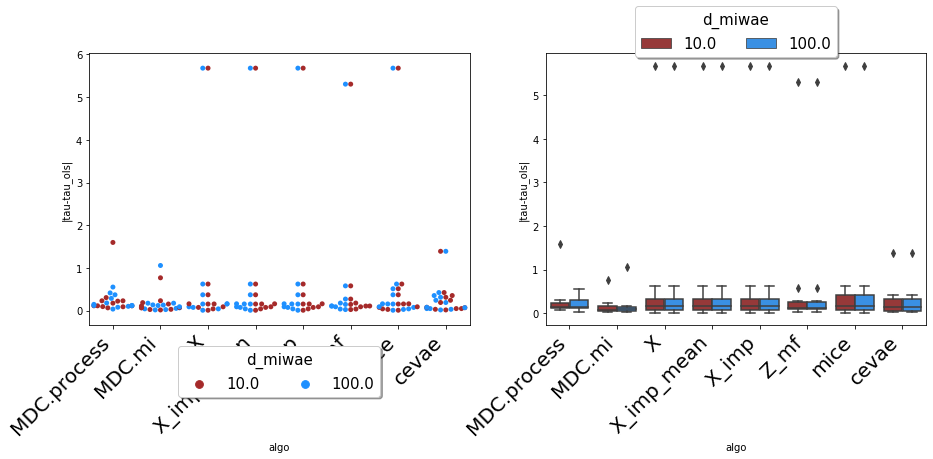

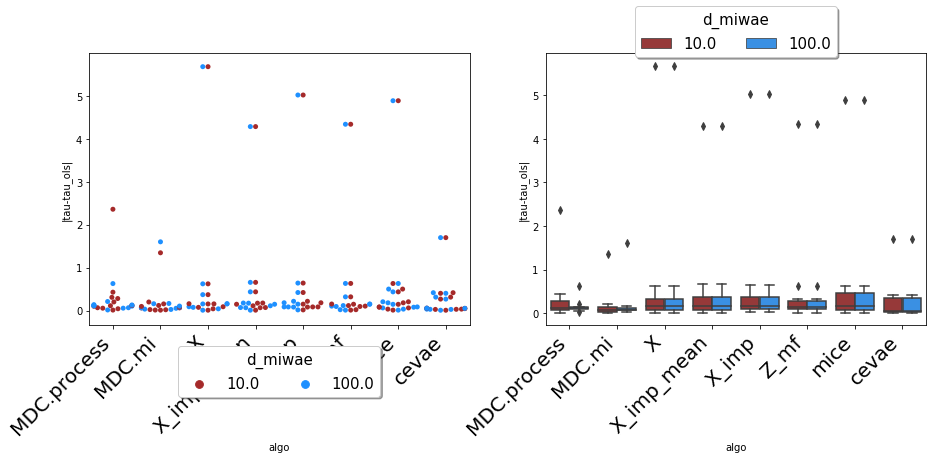

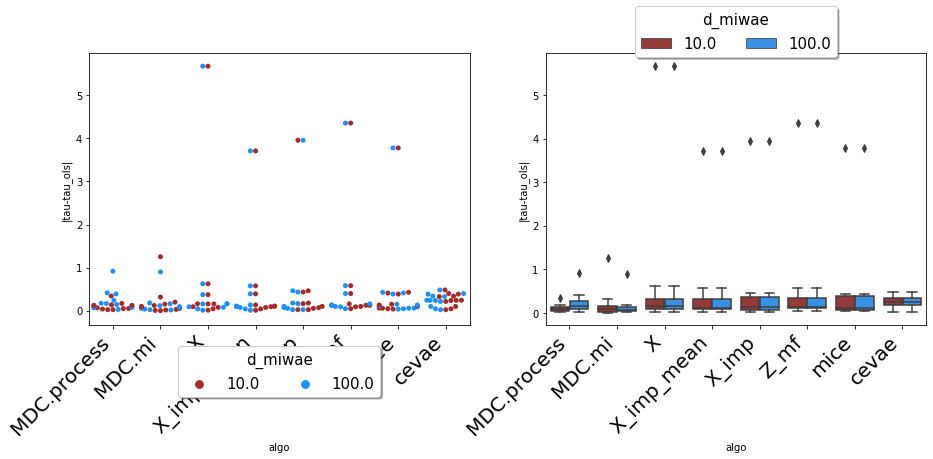

In [137]:
full_baseline = True
n_epochs = 400
sig_prior = 0.1
for prop_miss in [0,0.1,0.3]:#, 0.5]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice, df_cevae_results = df_cevae,
                              loss = loss,
                              baseline = 'ihdp', full_baseline = full_baseline,
                              hue = 'd_miwae', palette=['brown','dodgerblue'], save_plot = 'varyingP.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, df_cevae_results = df_cevae,
                          loss = loss,
                          baseline = 'ihdp',full_baseline = full_baseline,
                          hue = 'd_miwae', palette=['brown','dodgerblue'])

## Medium prior variance

Proportion of missing values: 0
best_params= {'add_wy': False, 'sig_prior': 1.0, 'prop_miss': 0.0, 'd_miwae': 10, 'n_epochs': 400, 'method': 'glm'}
best_params= {'add_wy': False, 'sig_prior': 1.0, 'prop_miss': 0.0, 'd_miwae': 100, 'n_epochs': 400, 'method': 'glm'}


/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue
/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


d_miwae : 10
MDC.process: mean  |tau-tau_ols| : 0.4951826696997701 std:  0.26121466490832773
MDC.mi: mean  |tau-tau_ols| : 0.42314432894089676 std:  0.20122026968033827
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : 0.2675710951203664 std:  0.10971696512680312
mice: mean  |tau-tau_ols| : 0.6588740911268439 std:  0.45983562047750576
mean_imp: mean  |tau-tau_ols| : 0.7364489540539498 std:  0.55209909613059
full: mean  |tau-tau_ols| : 0.7364489540539492 std:  0.5520990961305902
d_miwae : 100
MDC.process: mean  |tau-tau_ols| : 0.4925772366730654 std:  0.30206770650267545
MDC.mi: mean  |tau-tau_ols| : 0.36410109607656294 std:  0.18315621050476769
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : 0.2675710951203664 std:  0.10971696512680312
mice: mean  |tau-tau_ols| : 0.6588740911268439 std:  0.45983562047750576
mean_imp: mean  |tau-tau_ols| : 0.7364489540539498 std:  0.55209909613059
full: mean  |tau-tau_ols| : 0.7364489540539492 std:  0.552099096130

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue
/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


d_miwae : 10
MDC.process: mean  |tau-tau_ols| : 0.5922400784356988 std:  0.37828201558809144
MDC.mi: mean  |tau-tau_ols| : 0.5107056777792124 std:  0.29812100140919945
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : 0.2801092078617157 std:  0.13658969966005977
mice: mean  |tau-tau_ols| : 0.6053736015950477 std:  0.3933984373220288
mean_imp: mean  |tau-tau_ols| : 0.6138852684290048 std:  0.41243001730107126
full: mean  |tau-tau_ols| : 0.7364489540539492 std:  0.5520990961305902
d_miwae : 100
MDC.process: mean  |tau-tau_ols| : 0.4115496811830807 std:  0.1873524394650019
MDC.mi: mean  |tau-tau_ols| : 0.23188186750987785 std:  0.06749799286002488
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : 0.2801092078617157 std:  0.13658969966005977
mice: mean  |tau-tau_ols| : 0.6053736015950477 std:  0.3933984373220288
mean_imp: mean  |tau-tau_ols| : 0.6138852684290048 std:  0.41243001730107126
full: mean  |tau-tau_ols| : 0.7364489540539492 std:  0.5520990961

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue
/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


d_miwae : 10
MDC.process: mean  |tau-tau_ols| : 0.3044529984977538 std:  0.10823032146739255
MDC.mi: mean  |tau-tau_ols| : 0.2105465414228225 std:  0.06872587077965589
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : 0.2508647385726034 std:  0.04142118576658343
mice: mean  |tau-tau_ols| : 0.4723329095186983 std:  0.30370889727162703
mean_imp: mean  |tau-tau_ols| : 0.5226463373707324 std:  0.35863129080494255
full: mean  |tau-tau_ols| : 0.7364489540539492 std:  0.5520990961305902
d_miwae : 100
MDC.process: mean  |tau-tau_ols| : 0.32329878101176784 std:  0.2006929012480235
MDC.mi: mean  |tau-tau_ols| : 0.17213449115235105 std:  0.05471291642044565
MF: mean  |tau-tau_ols| : nan std:  nan
cevae: mean  |tau-tau_ols| : 0.2508647385726034 std:  0.04142118576658343
mice: mean  |tau-tau_ols| : 0.4723329095186983 std:  0.30370889727162703
mean_imp: mean  |tau-tau_ols| : 0.5226463373707324 std:  0.35863129080494255
full: mean  |tau-tau_ols| : 0.7364489540539492 std:  0.5520990

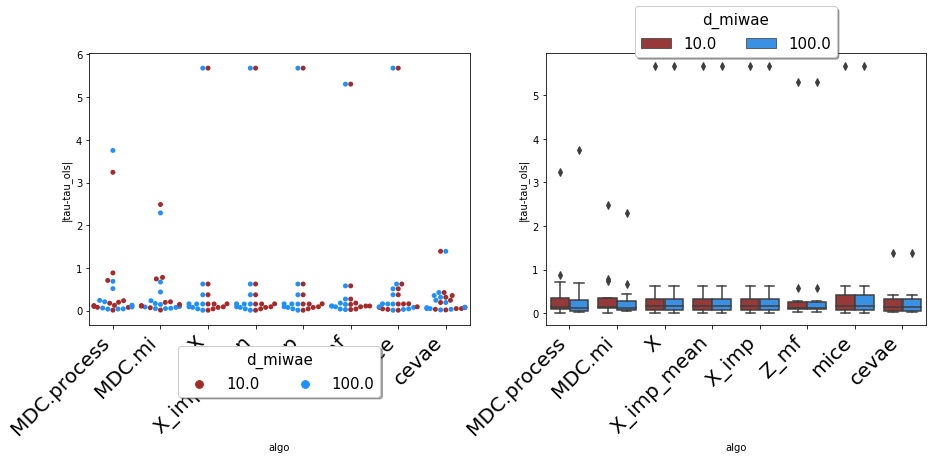

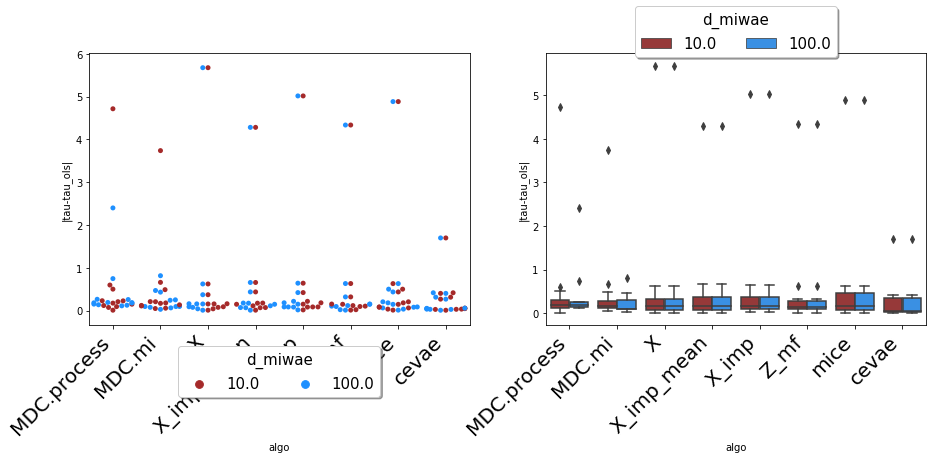

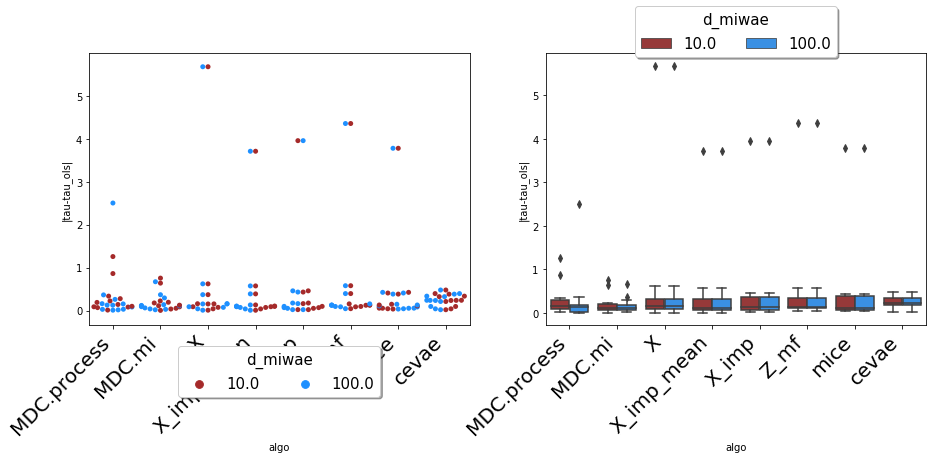

In [138]:
full_baseline = True
n_epochs = 400
sig_prior = 1
for prop_miss in [0,0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice, df_cevae_results = df_cevae,
                              loss = loss,
                              baseline = 'ihdp',full_baseline = full_baseline,
                              hue = 'd_miwae', palette=['brown','dodgerblue'], save_plot = 'varyingP.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, df_cevae_results = df_cevae,
                              loss = loss,
                          baseline = 'ihdp',full_baseline = full_baseline,
                          hue = 'd_miwae', palette=['brown','dodgerblue'])

## Large prior variance

Proportion of missing values: 0
best_params= {'add_wy': False, 'sig_prior': 10.0, 'prop_miss': 0.0, 'd_miwae': 10, 'n_epochs': 400, 'method': 'glm'}
best_params= {'add_wy': False, 'sig_prior': 10.0, 'prop_miss': 0.0, 'd_miwae': 100, 'n_epochs': 400, 'method': 'glm'}


/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue
/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


d_miwae : 10
MDC.process: mean  |tau-tau_dr| : 0.11539614745547161 std:  0.026461141100660314
MDC.mi: mean  |tau-tau_dr| : 0.13053995768959845 std:  0.037816731565177064
MF: mean  |tau-tau_dr| : nan std:  nan
cevae: mean  |tau-tau_dr| : 0.2675710951203664 std:  0.10971696512680312
mice: mean  |tau-tau_dr| : 0.10565030265984258 std:  0.03760312224840454
mean_imp: mean  |tau-tau_dr| : 0.1207401491490288 std:  0.04366056810068035
full: mean  |tau-tau_dr| : 0.1207401491490288 std:  0.04366056810068035
d_miwae : 100
MDC.process: mean  |tau-tau_dr| : 0.28715585391214105 std:  0.11749109535905722
MDC.mi: mean  |tau-tau_dr| : 0.2360971683630469 std:  0.14118476101659286
MF: mean  |tau-tau_dr| : nan std:  nan
cevae: mean  |tau-tau_dr| : 0.2675710951203664 std:  0.10971696512680312
mice: mean  |tau-tau_dr| : 0.10565030265984258 std:  0.03760312224840454
mean_imp: mean  |tau-tau_dr| : 0.1207401491490288 std:  0.04366056810068035
full: mean  |tau-tau_dr| : 0.1207401491490288 std:  0.04366056810068

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue
/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


d_miwae : 10
MDC.process: mean  |tau-tau_dr| : 0.11593436078762327 std:  0.024904546283857597
MDC.mi: mean  |tau-tau_dr| : 0.11177867837553764 std:  0.030412183688595693
MF: mean  |tau-tau_dr| : nan std:  nan
cevae: mean  |tau-tau_dr| : 0.2801092078617157 std:  0.13658969966005977
mice: mean  |tau-tau_dr| : 0.08459013534409965 std:  0.013963437764767245
mean_imp: mean  |tau-tau_dr| : 0.08039095323208248 std:  0.020911369155753215
full: mean  |tau-tau_dr| : 0.1207401491490288 std:  0.04366056810068035
d_miwae : 100
MDC.process: mean  |tau-tau_dr| : 0.285685783867104 std:  0.13132778128867384
MDC.mi: mean  |tau-tau_dr| : 0.22330340345658825 std:  0.13140434983184412
MF: mean  |tau-tau_dr| : nan std:  nan
cevae: mean  |tau-tau_dr| : 0.2801092078617157 std:  0.13658969966005977
mice: mean  |tau-tau_dr| : 0.08459013534409965 std:  0.013963437764767245
mean_imp: mean  |tau-tau_dr| : 0.08039095323208248 std:  0.020911369155753215
full: mean  |tau-tau_dr| : 0.1207401491490288 std:  0.043660568

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue
/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


d_miwae : 10
MDC.process: mean  |tau-tau_dr| : 0.1613851752134938 std:  0.061490865796900544
MDC.mi: mean  |tau-tau_dr| : 0.17674719305945116 std:  0.08797613437774753
MF: mean  |tau-tau_dr| : nan std:  nan
cevae: mean  |tau-tau_dr| : 0.2508647385726034 std:  0.04142118576658343
mice: mean  |tau-tau_dr| : 0.09956332674823125 std:  0.0204185342987465
mean_imp: mean  |tau-tau_dr| : 0.10131751723641953 std:  0.02762357814983115
full: mean  |tau-tau_dr| : 0.1207401491490288 std:  0.04366056810068035
d_miwae : 100
MDC.process: mean  |tau-tau_dr| : 0.28201984232799937 std:  0.11655278287861211
MDC.mi: mean  |tau-tau_dr| : 0.22163304584803026 std:  0.12839766413353285
MF: mean  |tau-tau_dr| : nan std:  nan
cevae: mean  |tau-tau_dr| : 0.2508647385726034 std:  0.04142118576658343
mice: mean  |tau-tau_dr| : 0.09956332674823125 std:  0.0204185342987465
mean_imp: mean  |tau-tau_dr| : 0.10131751723641953 std:  0.02762357814983115
full: mean  |tau-tau_dr| : 0.1207401491490288 std:  0.043660568100680

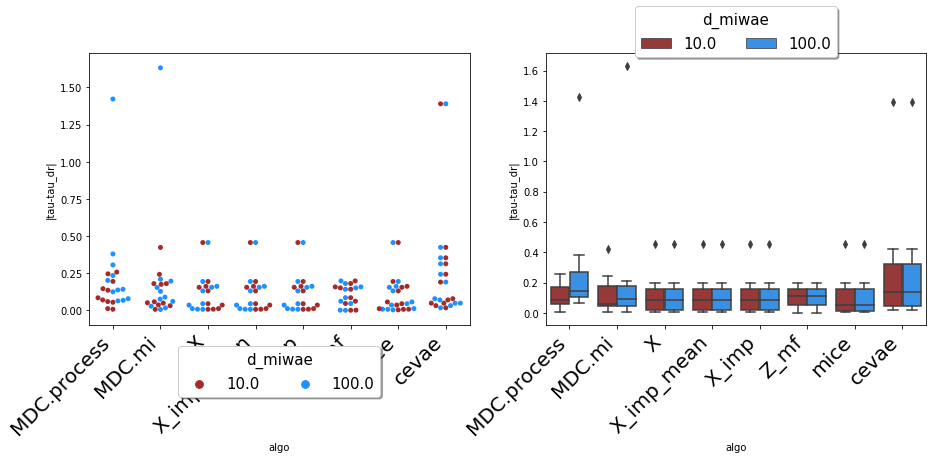

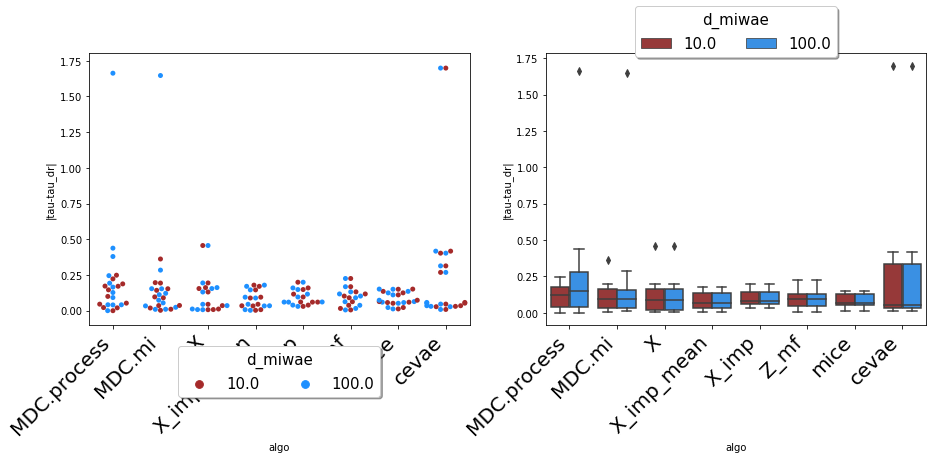

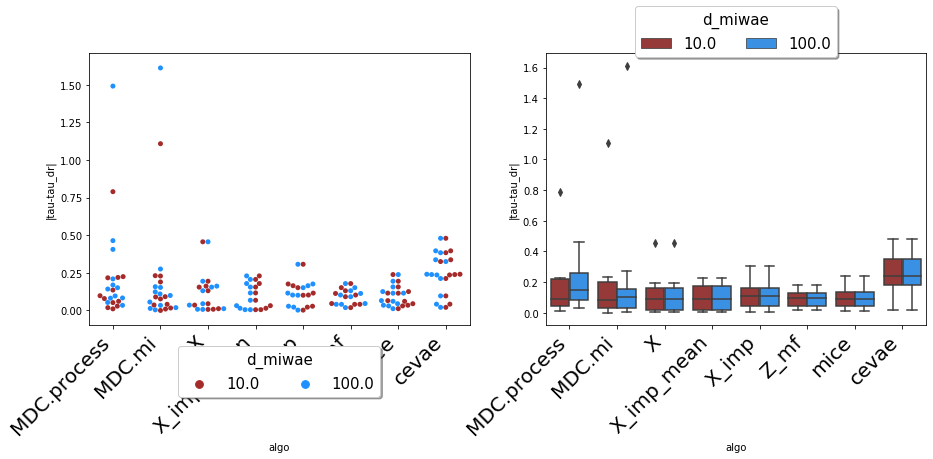

In [134]:
for prop_miss in [0,0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['n_epochs'] == 400) & (df['sig_prior']==10) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice,df_cevae_results = df_cevae,
                              loss = loss,
                              baseline = 'ihdp', full_baseline = full_baseline,
                              hue = 'd_miwae', palette=['brown','dodgerblue'], save_plot = 'varyingP.pdf',
                              ground_truth = gt)
    else:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['n_epochs'] == 400) & (df['sig_prior']==10) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, df_cevae_results = df_cevae,
                              loss = loss,
                          baseline = 'ihdp', full_baseline = full_baseline,
                          hue = 'd_miwae', palette=['brown','dodgerblue'],
                          ground_truth = gt)


## Number of epochs

In [ ]:
for p in [5, 100]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['citcio'] == False) & (df['prop_miss']==0.1) & (df['sig_prior']==0.1) & (df['p'] == p)], 
                              df_mice_results = df_mice, loss = loss,
                              hue = 'n_epochs', palette=['orange','green'], save_plot = 'varyingN_epochs.pdf')
    else: 
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['citcio'] == False) & (df['prop_miss']==0.1) & (df['sig_prior']==0.1) & (df['p'] == p)], 
                          df_mice_results = df_mice, loss = loss,
                          hue = 'n_epochs', palette=['orange','green'])


In [ ]:
for p in [5, 100]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['citcio'] == True) & (df['prop_miss']==0.1) & (df['sig_prior']==0.1) & (df['p'] == p)], 
                              df_mice_results = df_mice, loss = loss,
                              hue = 'n_epochs', palette=['orange','green'], save_plot = 'varyingN_epochs.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['citcio'] == True) & (df['prop_miss']==0.1) & (df['sig_prior']==0.1) & (df['p'] == p)], 
                          df_mice_results = df_mice, loss = loss,
                          hue = 'n_epochs', palette=['orange','green'])


In [ ]:
df_ = df_mice
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='lrmf']
df_ = df_.loc[df_['citcio']==False]
sns.swarmplot(x="n", y=loss,hue="seed", data=df_)

In [ ]:
df_ = df
# df_ = df_.loc[df_['n_epochs']==400]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='lrmf']
df_ = df_.loc[df_['sig_prior']==.1]
sns.swarmplot(x="n_epochs", y=loss,hue="seed", data=df_)

In [ ]:
df_ = df
# df_ = df_.loc[df_['n_epochs']==400]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==.1]
df_ = df_.loc[df_['citcio'] == False]
sns.swarmplot(x="n_epochs", y=loss,hue="seed", data=df_)

In [ ]:
boxplot_with_baseline(df_, loss = loss)

In [ ]:
df_base = get_baseline(model="dlvm", show=True, loss = loss)

In [ ]:
df_base_lrmf = get_baseline(model="lrmf", show=True, loss = loss)

In [ ]:
correlation_tau(df)

In [ ]:
#sns.pairplot(df[l_tau])

### Looking only at DLVM data results

In [ ]:
best_params, df_best = get_best_params(df.loc[df['model']=='dlvm'], loss = loss)

In [ ]:
boxplot_with_baseline(df_best, loss = loss)

In [ ]:
df_ = df
# df_ = df_.loc[df_['n_epochs']==400]
#df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==0.1]
df_ = df_.loc[df_['n_epochs']==10]
sns.swarmplot(x="p", y=loss,hue="seed", data=df_)

In [ ]:
df_ = df
# df_ = df_.loc[df_['n_epochs']==400]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==0.1]
sns.swarmplot(x="n_epochs", y=loss,hue="seed", data=df_)

#### Prop_miss = 0.1, small variance prior

In [ ]:
df_ = df
df_ = df_.loc[df_['n_epochs']==10]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==.1]

boxplot_with_baseline(df_, loss = loss)

#### Prop_miss = 0.3, small variance prior

In [ ]:
df_ = df
df_ = df_.loc[df_['n_epochs']==10]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==.1]

boxplot_with_baseline(df_, loss = loss)

#### Prop_miss = 0.1, large variance prior

In [ ]:
df_ = df
df_ = df_.loc[df_['n_epochs']==10]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==10]

boxplot_with_baseline(df_, loss = loss)

#### Prop_miss = 0.3, large variance prior

In [ ]:
df_ = df
df_ = df_.loc[df_['n_epochs']==10]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==10]

boxplot_with_baseline(df_, loss = loss)

### Interaction of parameters `p` and `sig_prior`

In [ ]:
df_ = df
#df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
#df_ = df_.loc[df_['sig_prior']==0.1]
df_ = df_.loc[df_['n_epochs']==10]

#df_ = df_.groupby(['sig_prior','p']).mean()
#df_ = df_.reset_index(level=['sig_prior','p'])
sns.swarmplot(x="sig_prior", y=loss,hue="p", data=df_)

In [ ]:
df_ = df
#df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
#df_ = df_.loc[df_['sig_prior']==0.1]
df_ = df_.loc[df_['n_epochs']==10]

df_ = df_.groupby(['sig_prior','p']).mean()
df_ = df_.reset_index(level=['sig_prior','p'])
sns.swarmplot(x="sig_prior", y=loss,hue="p", data=df_)

## CITCIO = True

### LRMF

In [ ]:
best_params, df_best = get_best_params(df.loc[(df['model']=='lrmf') & (df['citcio'])], loss = loss)

In [ ]:
boxplot_with_baseline(df_best, loss = loss)